In [26]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

## Loading the data

In [35]:
def header_to_array(file_path):
    # Read the header
    with open(file_path, 'r') as f:
        for row in f:
            header = row
            break
    header = [var.replace('\"','') for var in header.strip().split(';')]
    return header
    
    
def load_data(file_path):
    
    # Read the numerical data into a numpy array
    raw_data = np.genfromtxt(file_path, delimiter=';', skip_header=1)
    
    y_column = np.full([raw_data.shape[0], 1], np.nan) # Create y column filled with nan
    raw_data = np.append(raw_data, y_column, axis=1)   # append it to the dataset

    quality_index = raw_data.shape[1]-2
    y_col_index   = raw_data.shape[1]-1
    
    for n in range(raw_data.shape[0]):
        if raw_data[n,quality_index] >= 6.0:
            raw_data[n,y_col_index] = 1.0
        else:
            raw_data[n,y_col_index] = 0.0
            
    header = header_to_array(file_path)  # Read the header
    header.append('y_column') # Add the categorical y column
    return (raw_data, header)
    
    
red_wine = './data/wine/winequality-red.csv'
(raw_data, header) = load_data(red_wine)
print(raw_data)
print(header)

[[ 7.4    0.7    0.    ...  9.4    5.     0.   ]
 [ 7.8    0.88   0.    ...  9.8    5.     0.   ]
 [ 7.8    0.76   0.04  ...  9.8    5.     0.   ]
 ...
 [ 6.3    0.51   0.13  ... 11.     6.     1.   ]
 [ 5.9    0.645  0.12  ... 10.2    5.     0.   ]
 [ 6.     0.31   0.47  ... 11.     6.     1.   ]]
['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality', 'y_column']


## Printing the histograms

In [63]:
def get_basic_stats(column):
    """
        Return some basic stats on the data column
    """
    mean  = np.mean(column)
    std   = np.std(column)
    min_  = np.min(column)
    max_  = np.max(column)
    return "mean=%.2f, std=%.2f, min=%.2f, max=%.2f" % (mean,std,min_,max_)


def draw_histogram(raw_data, header, variable, nbins=50):
    """
        This function draws the histogram corresponding to the requested variable
    """
    fig = plt.figure(figsize=(12, 5))
    ax  = fig.add_subplot(111)

    # the histogram of the data
    column = raw_data[:, header.index(variable)]
    stats  = get_basic_stats(column)
    title  = 'Histogram of variable %s, nbins = %s\n%s' % (variable, nbins, stats)
    
    ax.hist(column, nbins, density=True, facecolor='g', alpha=0.75)
    ax.set_xlabel(variable)
    ax.set_ylabel('Frequence')
    ax.set_title(title)
    plt.show()
    

Split between input variables and variables to predict

In [64]:
y_vars = ['quality', 'y_column']
x_vars = [var for var in header if var not in y_vars]

### Input variables

['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']


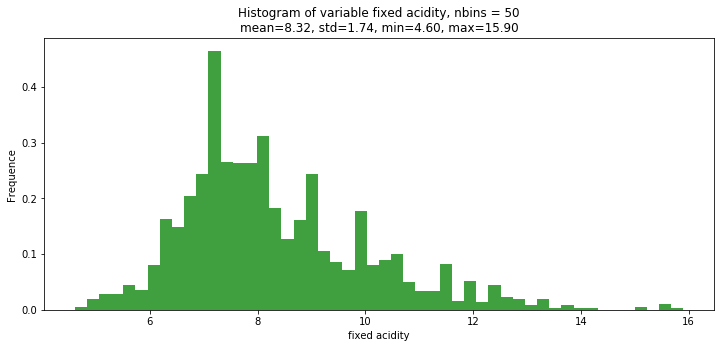

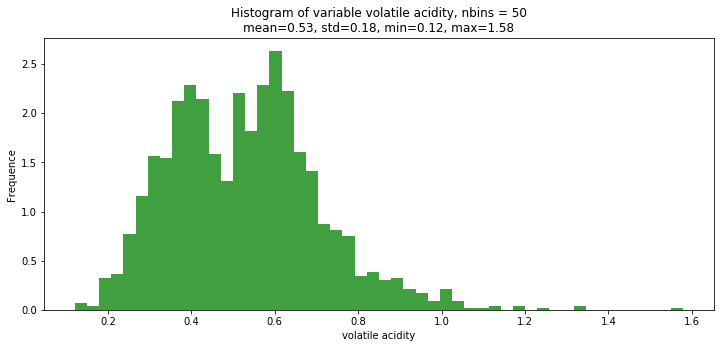

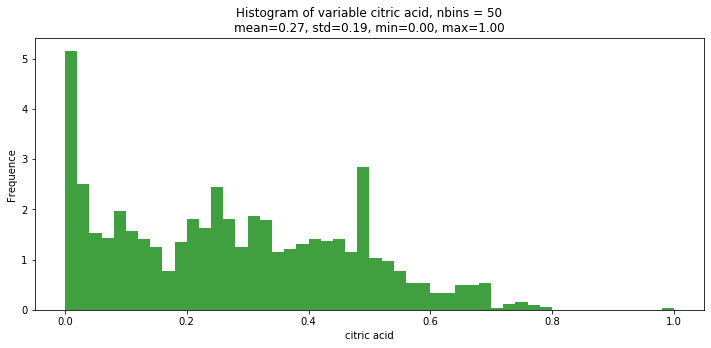

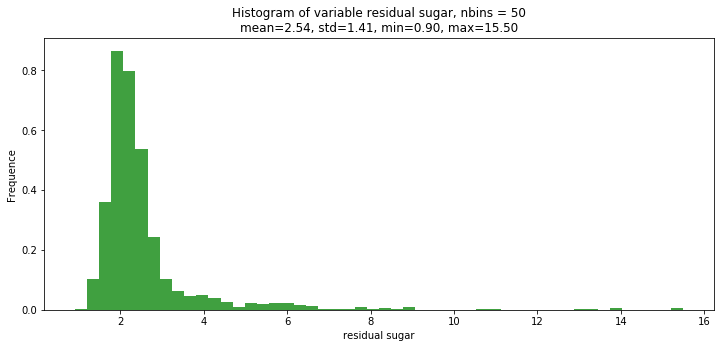

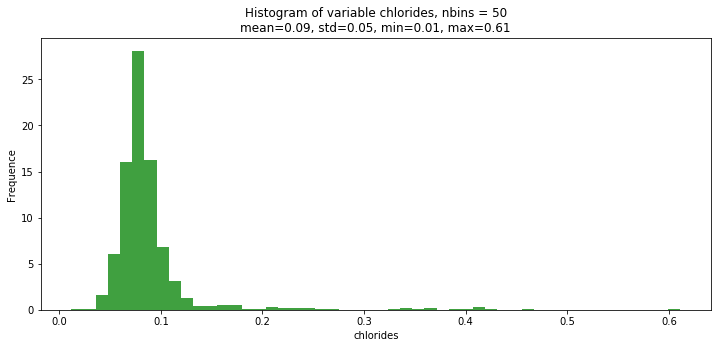

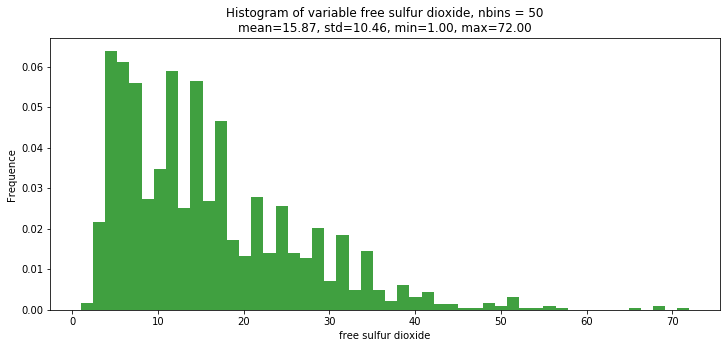

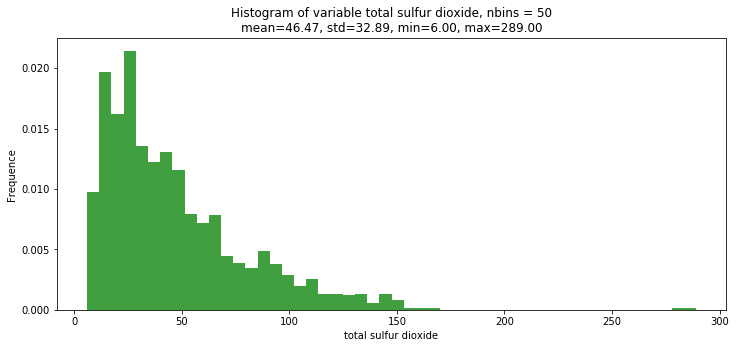

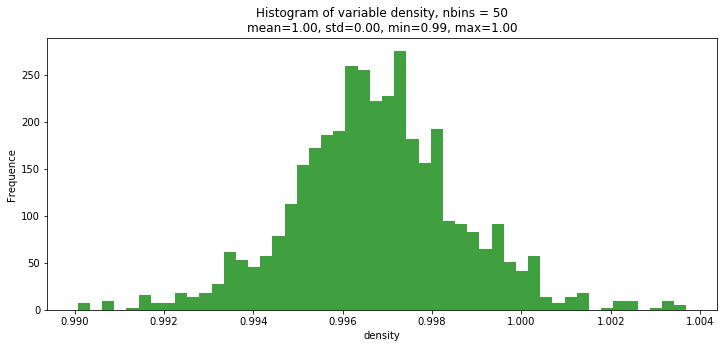

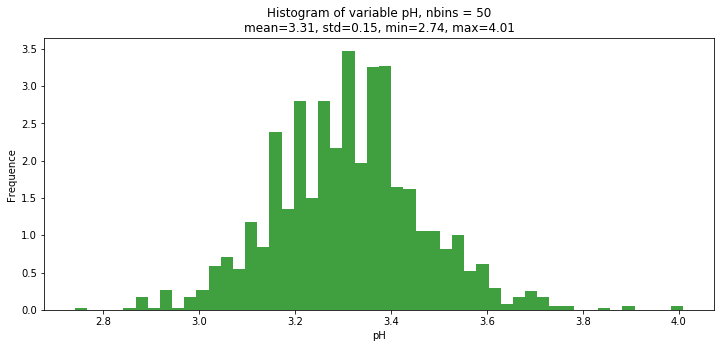

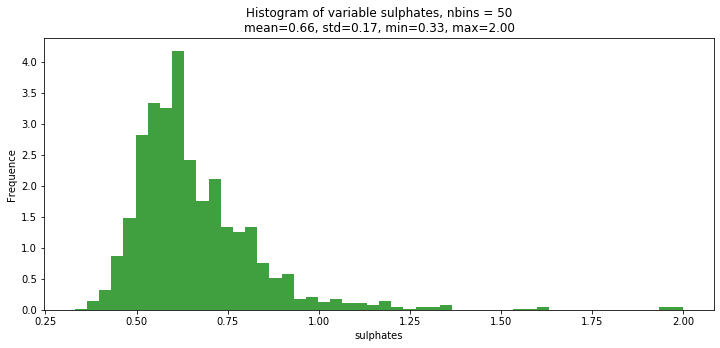

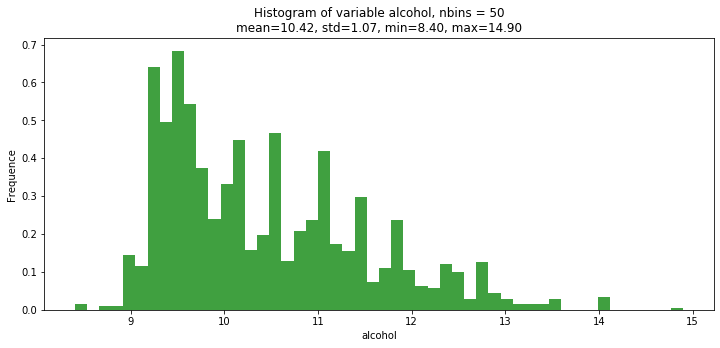

In [66]:
print(x_vars)
for variable in x_vars:
    draw_histogram(raw_data, header, variable)

### Variables to predict

['quality', 'y_column']


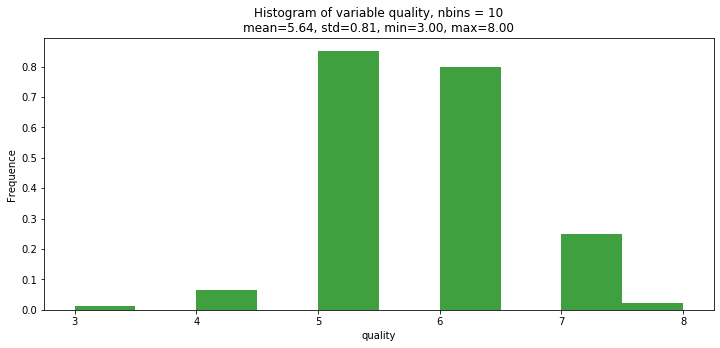

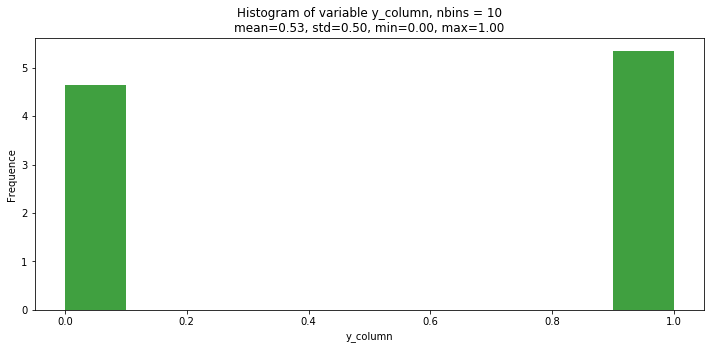

In [68]:
print(y_vars)
for variable in y_vars:
    draw_histogram(raw_data, header, variable, nbins=10)

## Draw Boxplots

In [71]:
def draw_boxplot(raw_data, header, variable, nbins=50):
    """
        This function draws the histogram corresponding to the requested variable
    """
    fig = plt.figure(figsize=(12, 5))
    ax  = fig.add_subplot(111)

    # the histogram of the data
    column = raw_data[:, header.index(variable)]
    stats  = get_basic_stats(column)
    title  = 'Boxplot of variable %s, nbins = %s\n%s' % (variable, nbins, stats)
    
    ax.boxplot(column)
    ax.set_xlabel(variable)
    ax.set_title(title)
    plt.show()

['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']


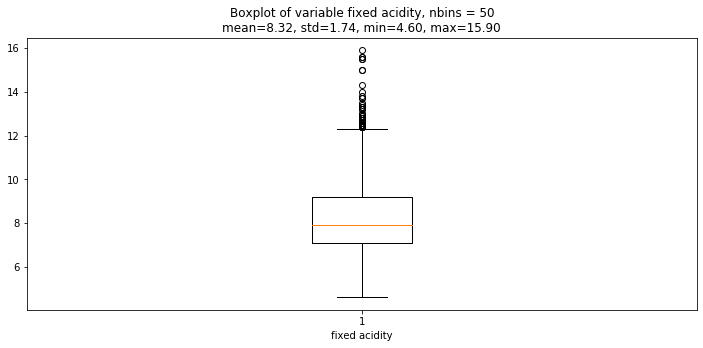

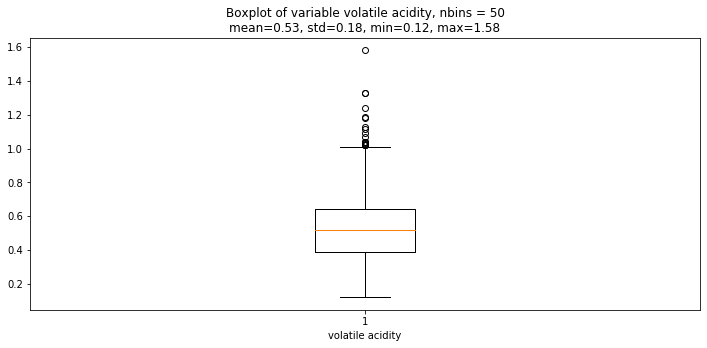

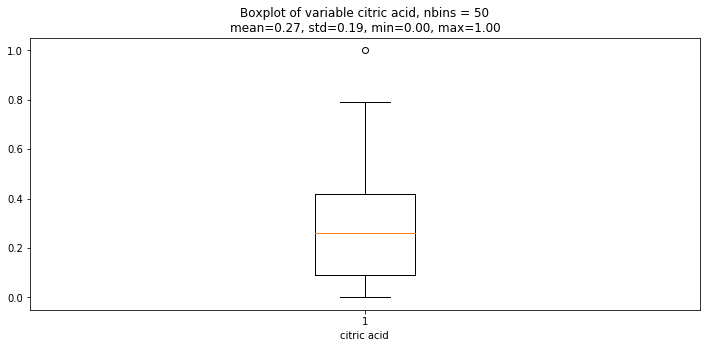

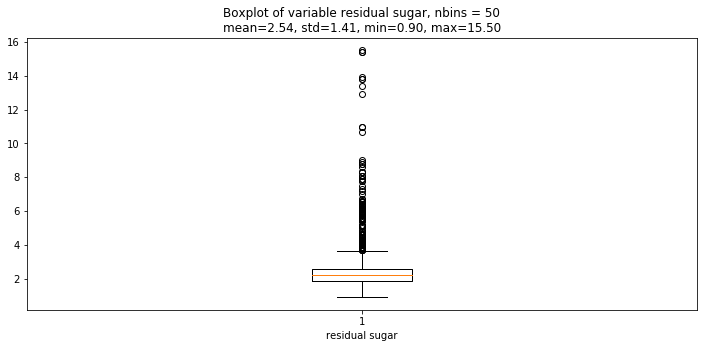

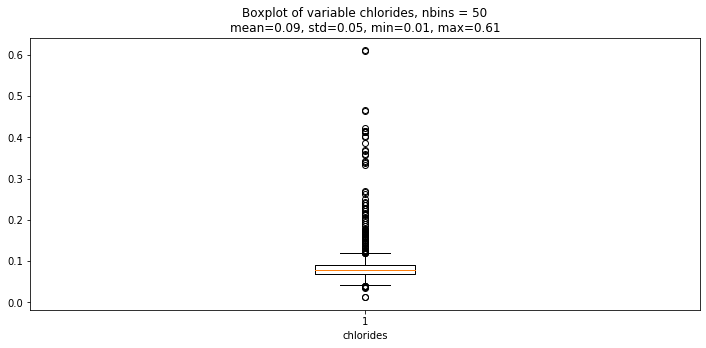

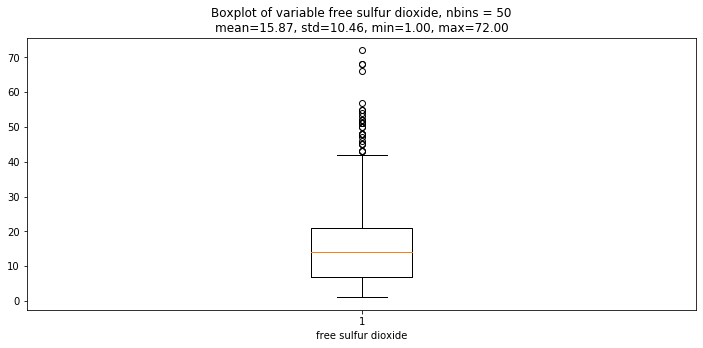

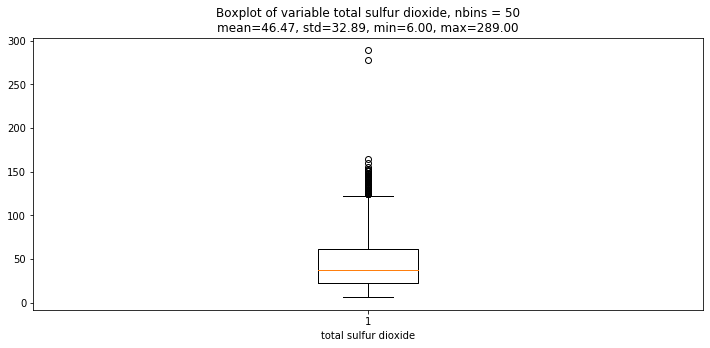

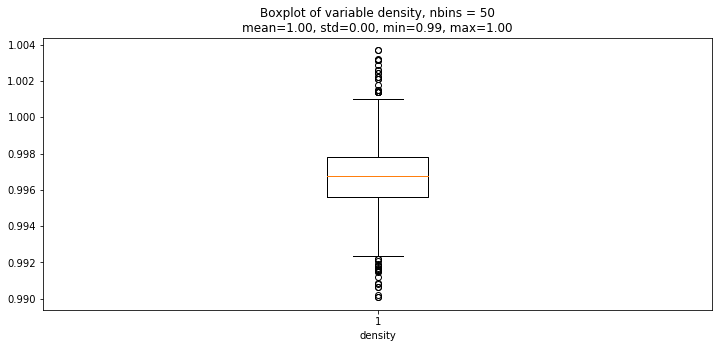

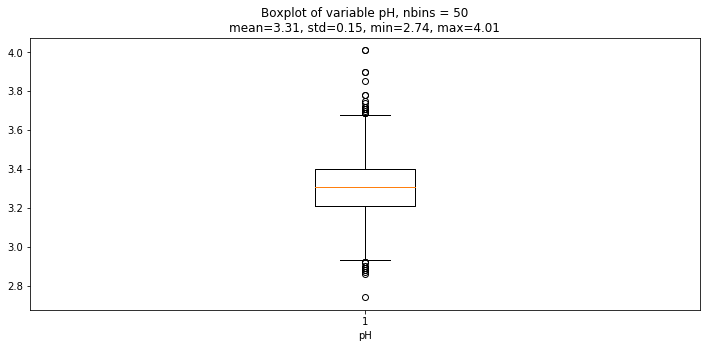

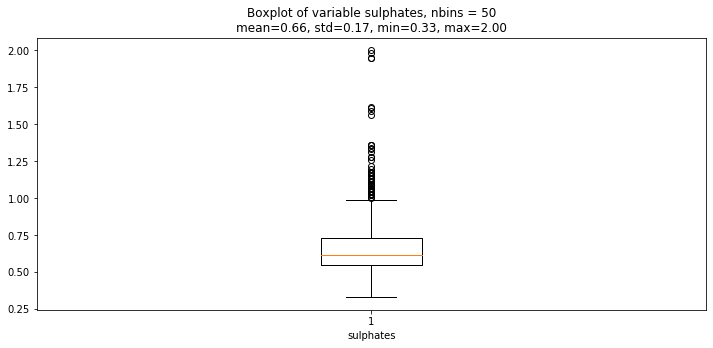

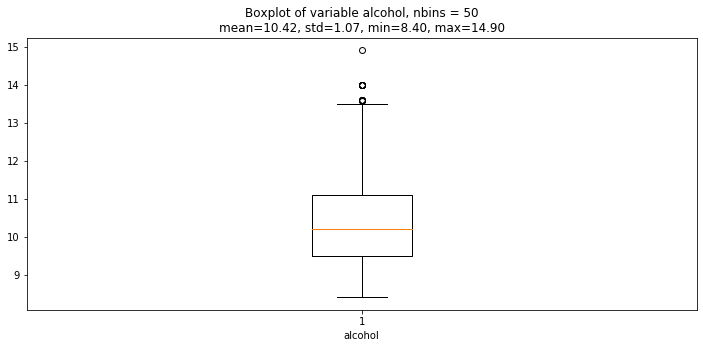

In [72]:
print(x_vars)
for variable in x_vars:
    draw_boxplot(raw_data, header, variable)